

# Loading the Data



In [1]:
import pickle

# Define the path to your data file in Google Drive
file_path_cap = 'cap.pck'
file_path_pref = 'pref.pck'


# Load capacity dictionary
with open(file_path_cap, "rb") as f:
    cap = pickle.load(f)

# Load preference/priority dictionary
with open(file_path_pref, "rb") as f:
    pref = pickle.load(f)

In [2]:
# School IDs directly from cap
school_ids = list(cap.keys())

# Student IDs are in pref but not in cap
student_ids = [k for k in pref.keys() if k not in cap]

print(f"Number of schools: {len(school_ids)}")
print(f"Sample school IDs: {school_ids}")

print(f"Number of students: {len(student_ids)}")
print(f"Sample student IDs: {student_ids[:5]}")

Number of schools: 100
Sample school IDs: ['8412_401000000133_REG', '8412_401000000133_PRI', '8413_401000000133_REG', '8413_401000000133_PRI', '8415_401000000133_REG', '8415_401000000133_PRI', '8417_401000000133_REG', '8417_401000000133_PIE', '8417_401000000133_PRI', '8420_401000000131_REG', '8420_401000000131_PRI', '8421_401000000133_REG', '8421_401000000133_PRI', '8422_401000000112_REG', '8422_401000000112_PRI', '8433_401000000131_REG', '8433_401000000131_PRI', '8433_401000000132_REG', '8433_401000000132_PRI', '8434_401000000133_REG', '8434_401000000133_PRI', '8435_401000000133_REG', '8435_401000000133_PRI', '8436_401000000133_REG', '8436_401000000133_PRI', '8437_401000000133_REG', '8437_401000000133_PIE', '8437_401000000133_PRI', '8438_401000000133_REG', '8438_401000000133_PRI', '8439_401000000131_REG', '8439_401000000131_PRI', '8439_401000000132_REG', '8439_401000000132_PRI', '8441_401000000133_REG', '8441_401000000133_PRI', '8442_401000000133_REG', '8442_401000000133_PRI', '8448_4

# Combining Regular and Priority Schools


In [3]:
from collections import defaultdict

In [4]:
merged_cap = {}
merged_pref = {}

# Identify base school IDs
base_school_ids = set()
for sid in cap.keys():
    if sid.endswith("_REG") or sid.endswith("_PRI"):
        base_id = sid.rsplit("_", 1)[0]
        base_school_ids.add(base_id)

In [5]:
# Merge REG and PRI schools
for base_id in base_school_ids:
    reg_id = base_id + "_REG"
    pri_id = base_id + "_PRI"

    # Capacity merge
    cap_reg = cap.get(reg_id, 0)
    cap_pri = cap.get(pri_id, 0)
    merged_cap[base_id] = cap_reg + cap_pri

    # Get priority lists from dicts sorted by rank (key)
    pri_list = [v for k, v in sorted(pref.get(pri_id, {}).items())]
    reg_list = [v for k, v in sorted(pref.get(reg_id, {}).items())]

    # Merge without duplicates
    seen = set()
    combined_priority = []
    for student in pri_list + reg_list:
        if student not in seen:
            seen.add(student)
            combined_priority.append(student)

    merged_pref[base_id] = combined_priority

In [6]:
# Add unchanged student preferences
for sid in pref:
    if sid not in cap:  # these are student IDs
        merged_pref[sid] = pref[sid]

In [7]:
print(f"Merged school count: {len(merged_cap)}")
sample_id = list(merged_cap.keys())[0]
print(f"Sample school ID: {sample_id}")
print(f"Capacity: {merged_cap[sample_id]}")
print(f"Top 5 priorities: {merged_pref[sample_id][:5]}")

Merged school count: 49
Sample school ID: 11687_401000000133
Capacity: 26
Top 5 priorities: ['5b86316c093da070f210b297', '5b863166093da070f2109788', '5b863190093da070f2115d9e', '5b8630fa093da070f20ea4d8', '5b863107093da070f20ee113']


In [56]:
import numpy as np
import pandas as pd

# 1. Number of students
num_students = len([k for k in pref if k not in cap])

# 2. Number of schools
num_schools = len(merged_cap)

# 3. Average number of schools ranked per student
student_prefs = {k: v for k, v in pref.items() if k not in cap}
avg_schools_ranked = np.mean([len(v) for v in student_prefs.values()])

# 4. School capacity stats
school_capacities = list(merged_cap.values())
min_capacity = min(school_capacities)
max_capacity = max(school_capacities)
total_capacity = sum(school_capacities)

# 5. Table summary as a DataFrame
summary_df = pd.DataFrame({
    "Statistic": [
        "Number of students",
        "Number of schools",
        "Average number of schools ranked per student",
        "Minimum school capacity",
        "Maximum school capacity",
        "Total original capacity (all schools)"
    ],
    "Value": [
        num_students,
        num_schools,
        round(avg_schools_ranked, 2),
        min_capacity,
        max_capacity,
        total_capacity
    ]
})

In [57]:
print(summary_df)

                                      Statistic    Value
0                            Number of students  1395.00
1                             Number of schools    49.00
2  Average number of schools ranked per student     6.47
3                       Minimum school capacity     3.00
4                       Maximum school capacity    80.00
5         Total original capacity (all schools)  1620.00


In [61]:
# Compute lengths of preference lists for all students
student_pref_lengths = {s: len(prefs) for s, prefs in ordered_student_prefs.items()}

# Get min and max length
min_len = min(student_pref_lengths.values())
max_len = max(student_pref_lengths.values())

# Find which students have those lengths
shortest_students = [s for s, l in student_pref_lengths.items() if l == min_len]
longest_students = [s for s, l in student_pref_lengths.items() if l == max_len]

# Print results
print(f"Shortest preference list length: {min_len} (for {len(shortest_students)} students)")
print(f"Longest preference list length: {max_len} (for {len(longest_students)} students)")

# Optionally, show examples:
print("\nExample student(s) with shortest list:")
for s in shortest_students[:3]:
    print(f"  {s}: {ordered_student_prefs[s]}")

print("\nExample student(s) with longest list:")
for s in longest_students[:3]:
    print(f"  {s}: {ordered_student_prefs[s]}")

Shortest preference list length: 1 (for 44 students)
Longest preference list length: 16 (for 1 students)

Example student(s) with shortest list:
  5b8630e7093da070f20e4d26: ['8483_401000000132']
  5b8630ea093da070f20e58a6: ['8483_401000000132']
  5b8630eb093da070f20e5e73: ['8483_401000000132']

Example student(s) with longest list:
  5b8630e4093da070f20e3cdc: ['8458_401000000132', '8433_401000000132', '8433_401000000131', '8457_401000000111', '24307_401000000232', '8439_401000000132', '8439_401000000131', '24302_401000000132', '24302_401000000131', '11687_401000000133', '8434_401000000133', '8435_401000000133', '8438_401000000133', '8442_401000000133', '24313_401000000132', '24313_401000000131']


In [44]:
import gurobipy as gp
from gurobipy import GRB

# Utility: remove seat-level suffix (e.g., "_REG", "_PRI", "_PIE")
def normalize_school_id(raw_id):
    return raw_id.rsplit('_', 1)[0]

# Utility: remove duplicates from a list while preserving order
def dedup(seq):
    seen = set()
    return [x for x in seq if not (x in seen or seen.add(x))]

# Step 1: Build ordered and normalized student preferences
ordered_student_prefs = {}
for s, p in student_prefs.items():
    if isinstance(p, dict):
        ordered_raw = [v for _, v in sorted(p.items())]
    elif isinstance(p, list):
        ordered_raw = p
    else:
        continue

    normalized = [normalize_school_id(school_id) for school_id in ordered_raw]
    ordered_student_prefs[s] = dedup(normalized)

# Step 2: Build ordered school preferences (already merged)
ordered_school_prefs = {}
for c, p in merged_pref.items():
    if isinstance(p, dict):
        ordered_school_prefs[c] = [v for _, v in sorted(p.items())]
    else:
        ordered_school_prefs[c] = p

# Step 3: Define feasible student-school pairs (F)
# Allow: any school that student ranked, and exists in capacity list
C = list(merged_cap.keys())
S = list(ordered_student_prefs.keys())

F = [(s, c) for s in S for c in ordered_student_prefs[s] if c in C]
print(f"Feasible (student, school) pairs: {len(F)}")

# Recompute utility weights: normalized linearly from student preference rank
u = {}
for s, prefs in ordered_student_prefs.items():
    L = len(prefs)
    for rank, c in enumerate(prefs):
        u[(s, c)] = 1 - (rank / L)  # Top choice gets 1, last gets 1/L
# Capacities and budget
q = merged_cap
B = 100  # example budget


Feasible (student, school) pairs: 4493


In [70]:

from IPython.display import display

def build_and_solve_model(F, S, C, u, q, B, ordered_student_prefs, ordered_school_prefs, model_type):
    """
    Builds and solves a stable matching model with optional capacity expansion.
    model_type: 'quadratic', 'mccormick', or 'aggregated_mccormick'
    """
    m = gp.Model(f"StableMatching_{model_type}")
    m.setParam('OutputFlag', 0)  # Silence solver output

    # Decision variables
    x = m.addVars(F, vtype=GRB.BINARY, name="x")
    t = m.addVars(C, vtype=GRB.INTEGER, lb=0, name="t")

    # Objective: maximize total student utility
    m.setObjective(gp.quicksum(u[s, c] * x[s, c] for (s, c) in F), GRB.MAXIMIZE)

    # Constraints
    for s in S:
        m.addConstr(gp.quicksum(x[s, c] for c in C if (s, c) in F) <= 1)

    for c in C:
        m.addConstr(gp.quicksum(x[s, c] for s in S if (s, c) in F) <= q[c] + t[c])

    m.addConstr(gp.quicksum(t[c] for c in C) <= B)

    M = B  # McCormick upper bound

    if model_type == 'quadratic':
        for s, c in F:
            if c not in ordered_student_prefs.get(s, []): continue
            student_rank = ordered_student_prefs[s].index(c)
            better_schools = ordered_student_prefs[s][:student_rank]

            if c not in ordered_school_prefs or s not in ordered_school_prefs[c]: continue
            school_rank = ordered_school_prefs[c].index(s)
            better_students = ordered_school_prefs[c][:school_rank]

            m.addQConstr(
                (q[c] + t[c]) * x[s, c] +
                (q[c] + t[c]) * gp.quicksum(x[s, c2] for c2 in better_schools if (s, c2) in F) +
                gp.quicksum(x[s2, c] for s2 in better_students if (s2, c) in F) >= 1
            )

    elif model_type == 'mccormick':
        alpha = m.addVars(F, vtype=GRB.CONTINUOUS, name="alpha")

        for s, c in F:
            m.addConstr(alpha[s, c] <= M * x[s, c])
            m.addConstr(alpha[s, c] <= t[c])
            m.addConstr(alpha[s, c] >= t[c] - M * (1 - x[s, c]))
            m.addConstr(alpha[s, c] >= 0)

        for s, c in F:
            if c not in ordered_student_prefs.get(s, []): continue
            student_rank = ordered_student_prefs[s].index(c)
            better_schools = ordered_student_prefs[s][:student_rank]

            if c not in ordered_school_prefs or s not in ordered_school_prefs[c]: continue
            school_rank = ordered_school_prefs[c].index(s)
            better_students = ordered_school_prefs[c][:school_rank]

            m.addConstr(
                q[c] * x[s, c] + alpha[s, c] +
                q[c] * gp.quicksum(x[s, c2] for c2 in better_schools if (s, c2) in F) +
                gp.quicksum(alpha[s, c2] for c2 in better_schools if (s, c2) in F) +
                gp.quicksum(x[s2, c] for s2 in better_students if (s2, c) in F) >= 1
            )

    elif model_type == 'aggregated_mccormick':
        alpha = m.addVars(F, vtype=GRB.CONTINUOUS, name="alpha")
        beta = m.addVars(F, vtype=GRB.CONTINUOUS, name="beta")
        z = m.addVars(F, vtype=GRB.CONTINUOUS, name="z")

        for s, c in F:
            m.addConstr(alpha[s, c] <= M * x[s, c])
            m.addConstr(alpha[s, c] <= t[c])
            m.addConstr(alpha[s, c] >= t[c] - M * (1 - x[s, c]))
            m.addConstr(alpha[s, c] >= 0)

        for s, c in F:
            if c not in ordered_student_prefs.get(s, []): continue
            student_rank = ordered_student_prefs[s].index(c)
            better_schools = ordered_student_prefs[s][:student_rank]

            if c not in ordered_school_prefs or s not in ordered_school_prefs[c]: continue
            school_rank = ordered_school_prefs[c].index(s)
            better_students = ordered_school_prefs[c][:school_rank]

            m.addConstr(z[s, c] == gp.quicksum(x[s, c2] for c2 in better_schools if (s, c2) in F))
            m.addConstr(beta[s, c] <= M * z[s, c])
            m.addConstr(beta[s, c] <= t[c])
            m.addConstr(beta[s, c] >= t[c] - M * (1 - z[s, c]))
            m.addConstr(beta[s, c] >= 0)

            m.addConstr(
                q[c] * x[s, c] + alpha[s, c] + q[c] * z[s, c] + beta[s, c] +
                gp.quicksum(x[s2, c] for s2 in better_students if (s2, c) in F) >= 1
            )

    m.optimize()

    # Post-solve analysis
    matches = [(s, c) for (s, c) in F if x[s, c].X > 0.5]
    num_matched = len(set(s for (s, c) in matches))
    total_utility = sum(u[s, c] for (s, c) in matches)
    avg_utility = total_utility / num_matched if num_matched > 0 else 0

    cap_used = {c: sum(1 for (s2, c2) in matches if c2 == c) for c in C}
    cap_added = {c: int(t[c].X) for c in C}

    student_utils = defaultdict(float)
    for s, c in matches:
        student_utils[s] = u.get((s, c), 0)

    min_student_util = min(student_utils.values()) if student_utils else 0
    std_student_util = np.std(list(student_utils.values())) if student_utils else 0

    # Compute school utility
    v = {}
    for c, prefs in ordered_school_prefs.items():
        L = len(prefs)
        for rank, s in enumerate(prefs):
            v[(c, s)] = 1 - (rank / L)

    school_utils = [v.get((c, s), 0) for s, c in matches]
    avg_school_util = sum(school_utils) / len(school_utils) if school_utils else 0

    return {
        "model_type": model_type,
        "total_matched": num_matched,
        "avg_student_utility": avg_utility,
        "avg_school_utility": avg_school_util,
        "capacity_used": cap_used,
        "capacity_added": cap_added,
        "matches": matches,
        "runtime": round(m.Runtime, 2),
        "min_student_utility": round(min_student_util, 4),
        "std_student_utility": round(std_student_util, 4),
    }

# Run all three models
results = []
for model_type in ['quadratic', 'mccormick', 'aggregated_mccormick']:
    results.append(build_and_solve_model(F, S, C, u, q, B, ordered_student_prefs, ordered_school_prefs, model_type))

# Display summary table
summary = pd.DataFrame([{
    "Model": r["model_type"],
    "Total Matched": r["total_matched"],
    "Avg Student Utility": r["avg_student_utility"],
    "Min Student Utility": r["min_student_utility"],
    "Std Student Utility": r["std_student_utility"],
    "Avg School Utility": r["avg_school_utility"],
    "Runtime (s)": r["runtime"]
} for r in results])

display(summary)


,Model,Total Matched,Avg Student Utility,Min Student Utility,Std Student Utility,Avg School Utility,Runtime (s)
0,quadratic,1394,0.90159,0.25,0.1803,0.566216,0.59
1,mccormick,1394,0.90159,0.25,0.1813,0.567587,2.22
2,aggregated_mccormick,1394,0.90159,0.25,0.1808,0.566042,3.26


In [60]:
# Collect all school capacity usage data across models
school_capacity_summary = []

for result in results:
    model_name = result['model_type']
    used = result['capacity_used']
    added = result['capacity_added']

    for c in C:
        school_capacity_summary.append({
            "Model": model_name,
            "School": c,
            "Used": used.get(c, 0),
            "Original": q[c],
            "Added": added.get(c, 0)
        })

# Convert to DataFrame for easier viewing
capacity_df = pd.DataFrame(school_capacity_summary)

#sort for readability
capacity_df = capacity_df.sort_values(by=["School", "Model"])


display(capacity_df)


,Model,School,Used,Original,Added
114,aggregated_mccormick,11678_401000000132,35,35,0
65,mccormick,11678_401000000132,35,35,0
16,quadratic,11678_401000000132,35,35,0
141,aggregated_mccormick,11680_401000000133,123,26,97
92,mccormick,11680_401000000133,122,26,96
...,...,...,...,...,...
69,mccormick,8482_401000000133,0,4,0
20,quadratic,8482_401000000133,0,4,0
119,aggregated_mccormick,8483_401000000132,25,35,0
70,mccormick,8483_401000000132,25,35,0


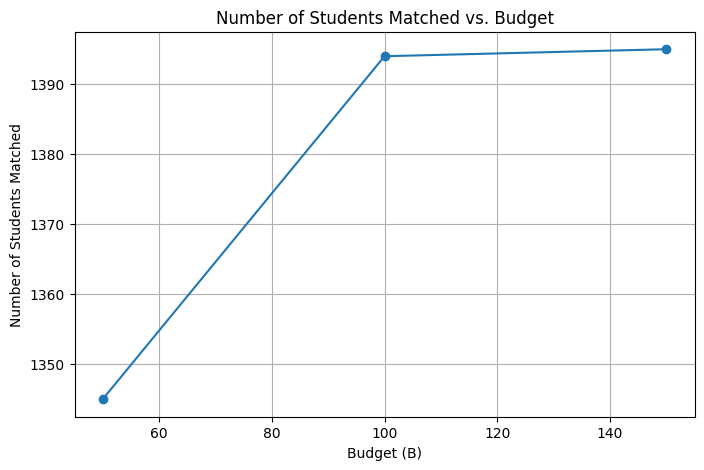

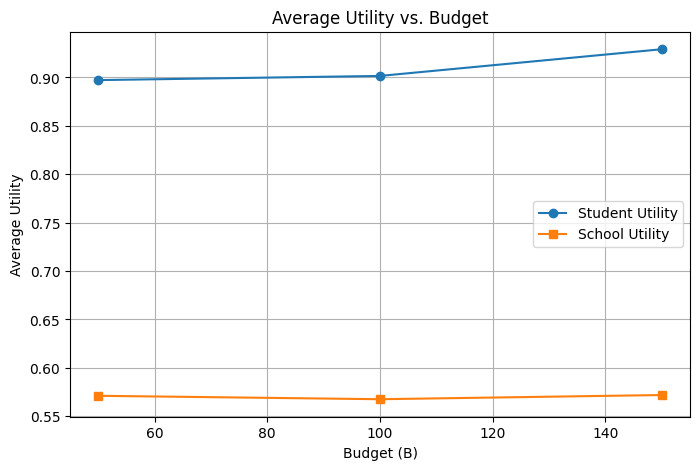

In [66]:
import matplotlib.pyplot as plt

# Define range of budget values
budget_range = [50, 100, 150]

# Store results for plotting
budget_results = []

for B_val in budget_range:
    result = build_and_solve_model(F, S, C, u, q, B_val, ordered_student_prefs, ordered_school_prefs, model_type='mccormick')
    result["B"] = B_val
    budget_results.append(result)

# Convert to DataFrame for plotting
budget_df = pd.DataFrame([{
    "Budget": r["B"],
    "Total Matched": r["total_matched"],
    "Avg Student Utility": r["avg_student_utility"],
    "Avg School Utility": r["avg_school_utility"]
} for r in budget_results])

# Plot: Number of students matched vs. Budget
plt.figure(figsize=(8, 5))
plt.plot(budget_df["Budget"], budget_df["Total Matched"], marker='o')
plt.title("Number of Students Matched vs. Budget")
plt.xlabel("Budget (B)")
plt.ylabel("Number of Students Matched")
plt.grid(True)
plt.show()

# Plot: Avg Student Utility vs. Budget
plt.figure(figsize=(8, 5))
plt.plot(budget_df["Budget"], budget_df["Avg Student Utility"], marker='o', label="Student Utility")
plt.plot(budget_df["Budget"], budget_df["Avg School Utility"], marker='s', label="School Utility")
plt.title("Average Utility vs. Budget")
plt.xlabel("Budget (B)")
plt.ylabel("Average Utility")
plt.legend()
plt.grid(True)
plt.show()